# Geometric Transformations


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

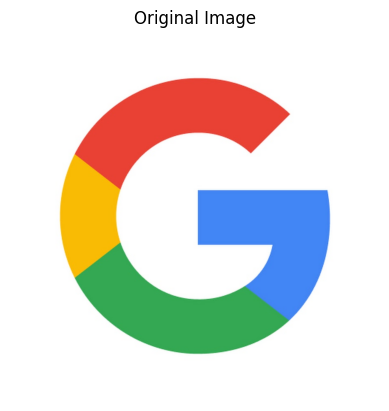

In [ ]:
img = cv.imread("image1.jpg")
image_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display the original image
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

### Scaling

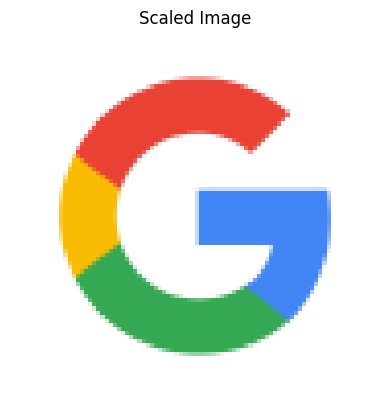

In [ ]:
scaled_image = cv.resize(img, None, fx=0.1, fy=0.1, interpolation=cv.INTER_AREA)

# cv2.INTER_AREA: When we need to shrink an image.
# cv2.INTER_CUBIC: Slow but more efficient.
# cv2.INTER_LINEAR: When zooming is required. (default)

plt.imshow(cv.cvtColor(scaled_image, cv.COLOR_BGR2RGB))
plt.title("Scaled Image")
plt.axis('off')
plt.show()

### Rotation

In [ ]:
# Rotation parameters
height, width = img.shape[:2]
center = (width // 2, height // 2)  # Center of rotation
angle = 45  # Rotation angle
scale = 1.0  # Scaling factor

rotation_matrix = cv.getRotationMatrix2D(center, angle, scale)

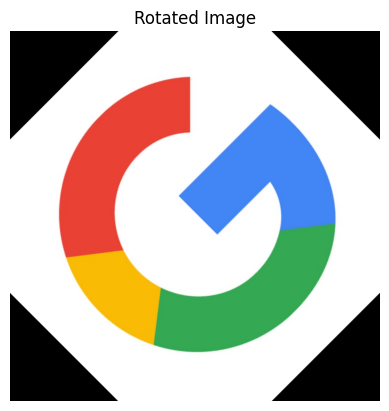

In [ ]:
rotated_image = cv.warpAffine(img, rotation_matrix, (width, height))

plt.imshow(cv.cvtColor(rotated_image, cv.COLOR_BGR2RGB))
plt.title("Rotated Image")
plt.axis('off')
plt.show()

### Translation (Shifting)

In [ ]:
# Translation parameters
tx, ty = 50, 100  # Shifting by 50 pixels right and 100 pixels down

translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])

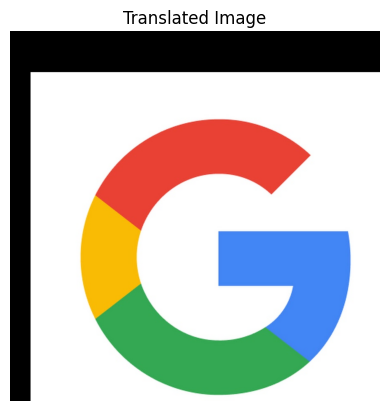

In [ ]:
translated_image = cv.warpAffine(img, translation_matrix, (width, height))

# Display translated image
plt.imshow(cv.cvtColor(translated_image, cv.COLOR_BGR2RGB))
plt.title("Translated Image")
plt.axis('off')
plt.show()


### Reflection

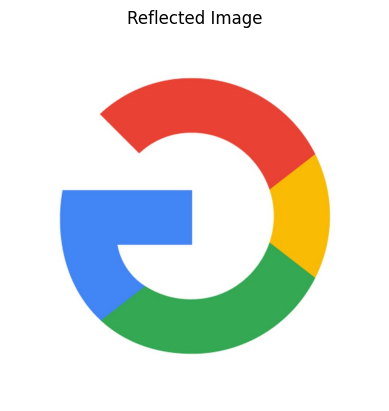

In [ ]:
reflected_image = cv.flip(img, 1) # 1 means a vertical flip, 0 flips horizontally, and -1 flips both

# Display reflected image
plt.imshow(cv.cvtColor(reflected_image, cv.COLOR_BGR2RGB))
plt.title("Reflected Image")
plt.axis('off')
plt.show()

### Shearing

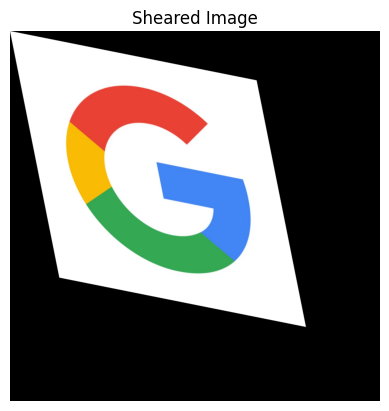

In [ ]:
# Shearing transformation
shear_matrix = np.float32([[1, 0.2, 0], [0.2, 1, 0]])
sheared_image = cv.warpAffine(img, shear_matrix, (int(width * 1.5), int(height * 1.5)))
# The sheared image might get clipped, as parts of the skewed image could extend beyond the canvas boundaries defined by (width, height)

# Display sheared image
plt.imshow(cv.cvtColor(sheared_image, cv.COLOR_BGR2RGB))
plt.title("Sheared Image")
plt.axis('off')
plt.show()

### Affine

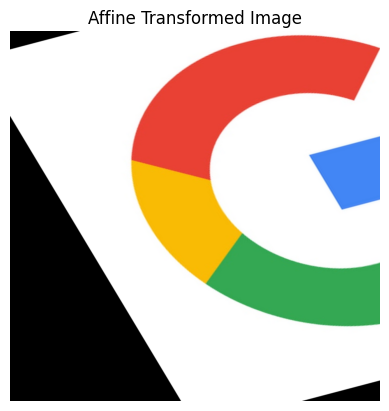

In [ ]:
src_points = np.float32([[50, 50], [200, 50], [50, 200]]) # Points on source image
dst_points = np.float32([[10, 100], [200, 50], [100, 250]]) # Points on destination image

# Affine transform matrix
affine_matrix = cv.getAffineTransform(src_points, dst_points)
affine_transformed_image = cv.warpAffine(img, affine_matrix, (width, height))

# Display affine transformed image
plt.imshow(cv.cvtColor(affine_transformed_image, cv.COLOR_BGR2RGB))
plt.title("Affine Transformed Image")
plt.axis('off')
plt.show()